# Homework 5 - Deep learning and ensemble methods

## Task 1: Deep learning (3 points)

<font color='grey'>*Note that this task partly overlaps with a task used in the Artificial Neural Networks course. However, repetition is the mother of all learning.* :-)</font>

The goal of this task is to get to know the possibilities in Python for training neural networks. We will try out a popular deep learning framework: [Keras](https://keras.io/). Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. Keras has very well designed API, which allows for concise code and flexibility at the same time.

We will do this based on an image dataset [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). The CIFAR-10 dataset consists of 60 000 photos divided into 10 classes (hence the name CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. Our goal is to train a neural network to classify these images.

The following instructions help to install required dependencies and load the data.

### Installation

#### Linux

To install Keras enter following on Conda command-line:
```
conda install keras
```

By default Keras uses Tensorflow backend. If you happen to have recent NVidia GPU on your machine, you might want to install GPU version of Tensorflow:
```
conda install tensorflow-gpu
```
When you import Keras in your code, you should see "Using TensorFlow backend." notice.

PS. If you have non-NVidia GPU, you might want to give a shot to [PlaidML](http://vertex.ai/blog/announcing-plaidml) Keras backend.

#### Windows

To install Keras enter following on Conda command-line:
```
pip install keras
```
By default Keras uses Tensorflow backend. If you happen to have recent NVidia GPU on your machine, you might want to install GPU version of Tensorflow:
```
pip install tensorflow-gpu
```
When you import Keras in your code, you should see "Using TensorFlow backend." notice.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


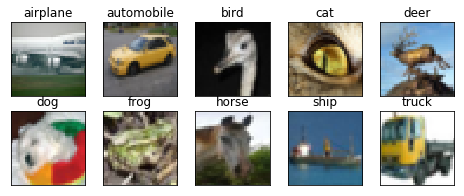

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(np.unique(y_train))
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

Building an effective neural network model requires careful consideration of the network architecture as well as the input data format.

First, let's get to know our data.

- **(a)** What do the 4 dimensions ((50000, 32, 32, 3)) of X_train represent? What values do these data contain and from what range do these values come from?

**<font color='purple'>Answer to (a):</font>** The dimensions are respectively the i-th instance (0-49999), the x-coordinate of the pixel, the y-coordinate of the pixel, and the RGB values (0-255).

In [4]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

- **(b)** The following code normalizes the training and testing data. Explain shortly why is data normalization important for training neural networks.

In [5]:
mu = X_train.mean(axis=(0,1,2))
std = X_train.std(axis=(0,1,2))
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std

**<font color='purple'>Answer to (b):</font>** Because it tends to make the training of our NN faster and also we tend not to get stuck in local minima while training.

Now we are ready to define our model. We will be using a Convolutional Neural Network (CNN) for this purpose. First we need to define the sequence of dependencies, the computational graph.

We define the following arcitecture:

1. 3x3 convolution with 32 filters, stride 1, padding same
2. batch normalization
3. relu
4. 3x3 convolution with 32 filters, stride 1, padding valid
5. batch normalization
6. relu
7. max pooling 2x2
8. dropout 0.25
7. flatten
8. dense 100
5. batch normalization
6. relu
8. dropout 0.5
8. dense 10
9. softmax

You can consult Keras documentation for layer parameters:
 - [Convolutional layers](https://keras.io/layers/convolutional/)
 - [Pooling layers](https://keras.io/layers/pooling/)
 - [Normalization layers](https://keras.io/layers/normalization/)

In [6]:
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout

x = Input(shape=(32, 32, 3))
c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
p2 = MaxPooling2D(pool_size=2)(a2)
d2 = Dropout(rate=0.25)(p2)
f2 = Flatten()(d2)
h3 = Dense(100)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(rate=0.5)(a3)
z = Dense(10)(d3)
p = Activation('softmax')(z)

- **(c)** Describe shortly what are Conv2D, BatchNormalization, Dropout and Dense? 

**<font color='purple'>Answer to (c):</font>**

Conv2D: Adds a convolutional layer to the network, which analyses the image according to the features and outputs images of the filters.

BatchNormalization: Normalizes the output so that it can be input to another layer like the activation layer.

Dropout: Is a method to fight against overfitting, kind of similar to Cross-validation, but instead of leaving out some data and then testing on it, we dont update some of the neurons in our NN.

Dense: Is the last layer and is for the voting and probabilities of the classes.

- **(d)** Why do we set parameter 10 in the last fully connected layer?

**<font color='purple'>Answer to (d):</font>** Because we have 10 classes for which we want the predictions.

Now that we have defined the arhitecture, we can create a model simply by saying what is the input and what is output. Cross-entropy loss is applied to the network with Adam optimizer and additional accuracy metric. sparse_categorical_crossentropy loss allows us to pass integer class values directly as targets and is potentially more efficient than categorical_crossentropy, which needs one-hot vectors as targets.

`model.summary()` prints out layer list with output shapes and is very useful for debugging the model. 

In [7]:
from keras.models import Model
from keras.optimizers import Adam

model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
__________

- **(e)** How many layers does our network have and how many parameters are we going to train?

**<font color='purple'>Answer to (e):</font>** The network has probably $6$ layers and we are going to train $731 582$ parameters

Now we train our first model in Keras. Keras follows style similar to Scikit-learn, where a model has methods `fit()`, `predict()` and `evaluate()`. We use `validation_split` parameter to automatically produce validation set that is 4% of the whole dataset.
**Note:** This can take a while

In [8]:
# Fit the model; returns History object
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=5, validation_split=0.04)

Train on 24000 samples, validate on 1000 samples
Epoch 1/5
24000/24000 [==============================] - 6s 262us/step - loss: 1.6135 - acc: 0.4307 - val_loss: 1.1749 - val_acc: 0.5710
Epoch 2/5
24000/24000 [==============================] - 4s 177us/step - loss: 1.2263 - acc: 0.5647 - val_loss: 1.0662 - val_acc: 0.6160
Epoch 3/5
24000/24000 [==============================] - 4s 181us/step - loss: 1.0794 - acc: 0.6222 - val_loss: 0.9861 - val_acc: 0.6590
Epoch 4/5
24000/24000 [==============================] - 4s 179us/step - loss: 0.9902 - acc: 0.6542 - val_loss: 0.9487 - val_acc: 0.6630
Epoch 5/5
24000/24000 [==============================] - 5s 188us/step - loss: 0.9325 - acc: 0.6704 - val_loss: 0.9439 - val_acc: 0.6610


- **(f)** Please explain the concepts of **batch** and **epoch**.

**<font color='purple'>Answer to (f):</font>** Batch size is how many instances we calculate at a time before we update the weights. An epoch is when the whole training dataset has been gone through once, so with $5$ epochs we go through the data $5$ times. Since the order of calculations before updating the weights does not really matter, the batch size is chosen so that we can do it concurrently and on the GPU, which makes it faster.

The following graphs illustrate the behaviour of Loss and Accuracy during the training process.

Text(0.5,1,'Accuracy')

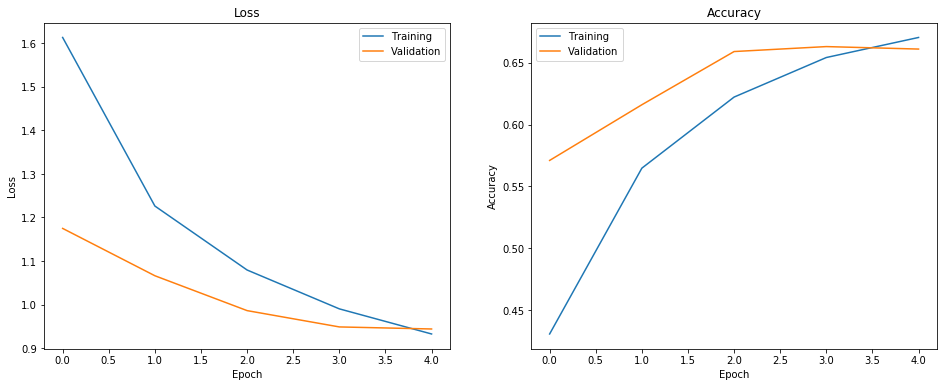

In [9]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

- **(g)** Explain what do you see in these figures. Does it makes sense?

**<font color='purple'>Answer to (g):</font>** I would say that the graphs make sense, since during the training phase we have dropout, so the accuracy should be lower and the loss higher. But as we progress through the epochs we can see that these get really close.

Next we will evaluate our trained network on the test and training data.

In [10]:
# IPython notebook just prints out the returned values - loss and accuracy
model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 1s 100us/step


[0.9489587209701538, 0.6668]

In [11]:
# the same for training set
model.evaluate(X_train_norm, y_train)

25000/25000 [==============================] - 2s 98us/step


[0.6607515947914123, 0.78088]

- **(h)** Based on the training and test accuracy, is the trained network good?

**<font color='purple'>Answer to (h):</font>** I would say that still the model is not that good. $65\%$ accuracy on the test data is quite low. I think the model still has some room for improvement. We can also see this from the meager $77\%$ accuracy on the training data.

- **(i)** Which class is predicted for the first image in this test set? Is it correctly classified? 

**<font color='purple'>Answer to (i):</font>** The prediction was that that the image classifies under the $7^{th}$ label, but is actually not true.

In [12]:
# TODO
fpre = model.predict(X_train_norm)[0]
actu = y_train[0]
print(np.argmax(fpre))
print(actu)

6
[6]


### Finding similar images

The simplest way to measure the similarity between images would be to use euclidean distance. 

- **(j)** Calculate the euclidean distance between all test images. Show 10 closest images for 10 randomly selected image by filling the caps in the code below. What do you observe?

In [13]:
# we have to flatten the images to calculate the distances
X_test_flat = np.reshape(X_test, (X_test.shape[0], -1))
X_test_flat.shape

(10000, 3072)

In [14]:
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(X_test_flat)

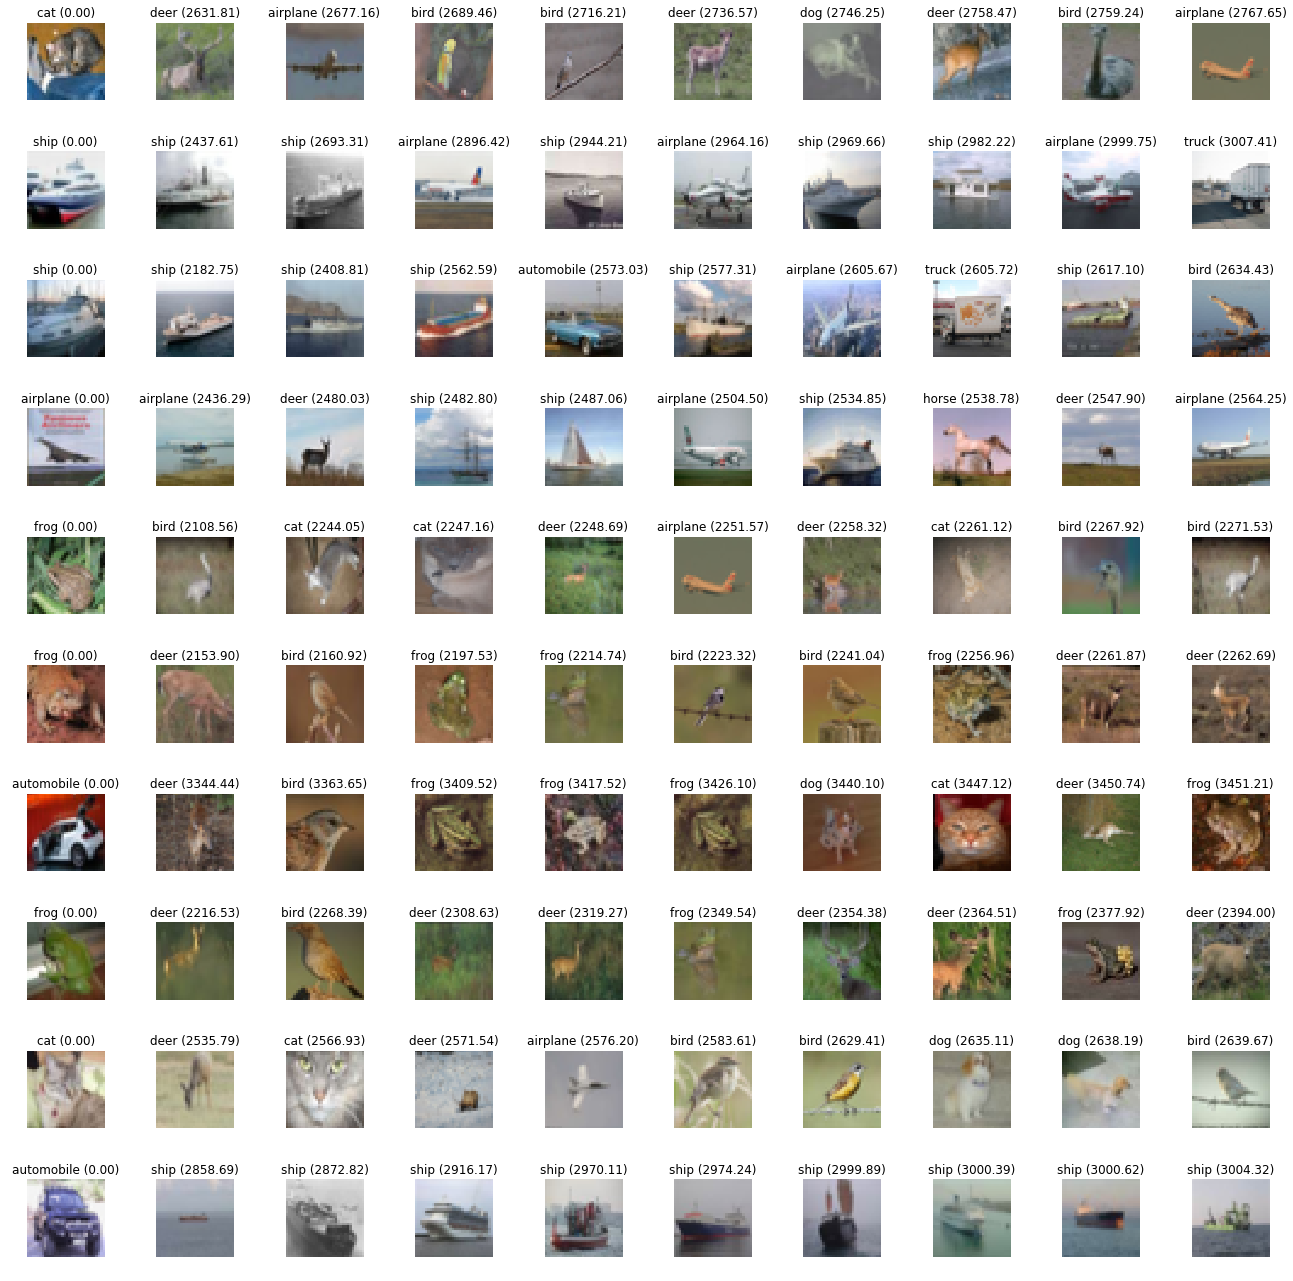

In [15]:
plt.figure(figsize=(18,18))
for i in range(10):
    closest = np.argsort(dists[i])[:10]
    for k, j in enumerate(closest):
        plt.subplot(10, 10, i*10 + k + 1)
        plt.imshow(X_test[j])
        c = class_names[y_test[j][0]]
        plt.axis('off')
        plt.title("%s (%0.2f)" % (c,dists[i, j]))
plt.tight_layout()

**<font color='purple'>Answer to (j):</font>** I can see that there is no picture, whose $10$ closest neighbours would be from the same class, according to the Euclidean classifier. 

**Feature extraction:** Model trained for classification can be used in other creative ways, for example finding similar images. The hidden layer activations can be thought of as features extracted from the images. As the final goal is to classifiy images into categories, we can assume that in the last layers the features of semantically similar images are similar. That means they are close to each other according to euclidean distance.

We choose to use `Dense(100)` layer features - it is positioned late in the network (close to output), meaning the features should reflect the semantic meaning relatively well.

We create a new model that outputs not the classification, but the `Dense(100)` layer features. We can now use `predict()` to produce features of the entire test set.

Notice we are using the activation value before dropout and before relu activation function.

In [16]:
# outputs are the features from Dense(100) layer of the previously trained model
# because we do not redefine the layers, weights remain the same
extract_model = Model(inputs=x, outputs=h3)
features = extract_model.predict(X_test_norm)
features.shape

(10000, 100)

- **(k)** Calculate euclidean distance matrix between these features and plot the closest images. Describe the results. Compare the results with the results from part **(j)**, what are the differences and why? 

In [17]:
dists = euclidean_distances(features)

The following code produces plots to see the closest images based on the extracted features.

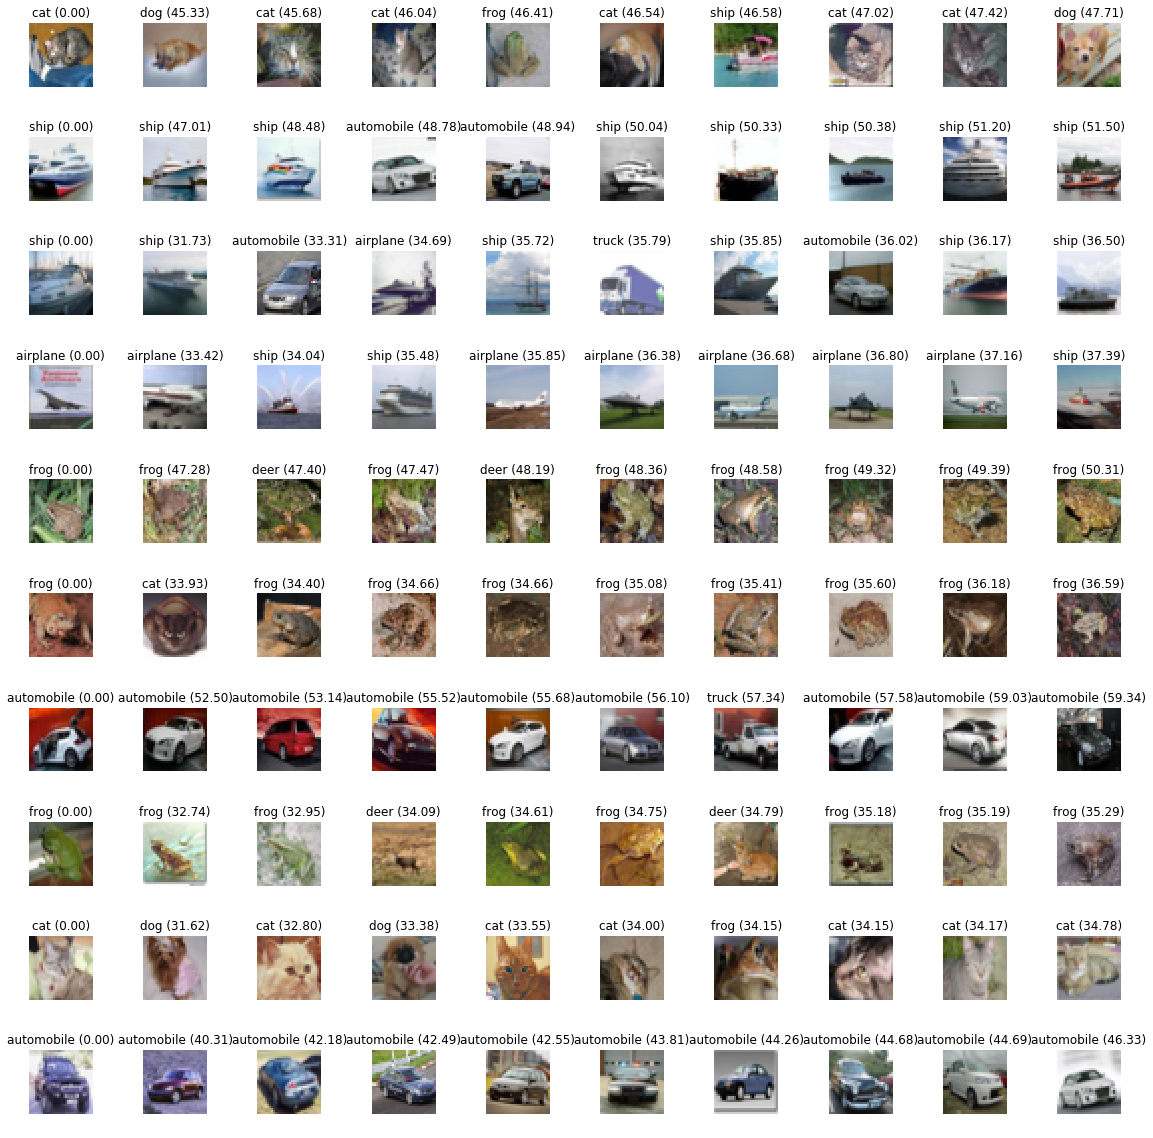

In [18]:
plt.figure(figsize=(16,16))
for i in range(10):
    closest = np.argsort(dists[i])[:10]
    for k, j in enumerate(closest):
        plt.subplot(10, 10, i*10 + k + 1)
        plt.imshow(X_test[j])
        c = class_names[y_test[j][0]]
        plt.axis('off')
        plt.title("%s (%0.2f)" % (c,dists[i, j]))
plt.tight_layout()

**<font color='purple'>Answer to (k):</font>** We can see that there is less variance in the labels. Also the distances have reduced significally copared to before. This is due to extracting the features after they have been through the model. Compared to before when we didnt extract any features, but just calculated between the original pictures.

 ## Task 2. Ensemble methods (3 points)

The goal of this homework is to get acquainted with some ensemble methods like bagging, boosting and random forests. For this we use the MNIST dataset about handwritten digits. In order to make the implementation easier we have stripped it down to only 2 digits: 2 and 3. The datasets for training and testing are in the files train.csv and test.csv. Both files have the same structure, with the first column indicating the class and all other columns are features providing the greyscale colour of pixels with values in the range 0..1.

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot") 

In [20]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [21]:
train.shape, test.shape

((387, 785), (2021, 785))

In [22]:
train.head()

,y,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,V785
0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train.y.value_counts(), test.y.value_counts()

(-1    197
  1    190
 Name: y, dtype: int64,  1    1031
 -1     990
 Name: y, dtype: int64)

We have also provided the code for plotting these images that we are trying to classify.

In [24]:
def draw_img(data, index):
    pixels = data.iloc[index][1:]
    pixels = pixels.values.reshape((28, 28))
    plt.title('Label is {label}'.format(label="3" if data.iloc[index][0] == 1 else "2"))
    plt.imshow(pixels, cmap='gray')
    plt.show()

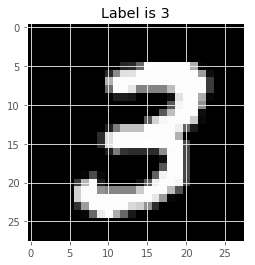

In [25]:
draw_img(train, 1)

<div class="bg-danger">In all of the following exercises use **random_state 0** when using sklearn methods.</div>
<br>
<div class="bg-danger">Use **sklearn DecisionTreeClassifier** in all of the exercises above. No need to implement this yourself.</div>

### Subtask 1: Bagging (1 point)

Bagging is a method where an ensemble of classifiers is trained on bootstrap samples of training data. To generate a bootstrap sample of a dataset with n rows one has to sample with replacement n rows from training data. The ensemble prediction is obtained by getting the predictions from each individual model and predicting the result with the most ”votes”.

- **(a)** Using sklearn.BaggingClassifier class train a bagging classifier on training data using 50 bootstrap samples (leave all other parameters at their default values). Measure and report the misclassification rate of the ensemble both on train and test data. Study the documentation and report what learning algorithm is being used to learn the individual models.

In [26]:
# TODO
bagcl = BaggingClassifier(max_samples = 50, random_state = 0).fit(train.drop(columns = ["y"]), train.y)

def reportScores(model, train, test):

    tracc = accuracy_score(train.y, model.predict(train.drop(columns = ["y"])))
    teacc = accuracy_score(test.y, model.predict(test.drop(columns = ["y"])))

    print("Training accuracy is {:.4f}".format(tracc))
    print("Testing accuracy is {:.4f}".format(teacc))
    
reportScores(bagcl, train, test)

Training accuracy is 0.9328
Testing accuracy is 0.8986


**<font color='purple'>Misclassification rate on train data:</font>** Rate is around $6.72\%$

**<font color='purple'>Misclassification rate on test data:</font>** Rate is around $10.14\%$

**<font color='purple'>Learning algorithm for individual models:</font>** The learning algorithm is a decision tree.

- **(b)** Solve the same task as in Exercise 1 but implement bagging yourself, training the base classifier with DecisionTreeClassifier. Measure and report its misclassification rate on train and test data.

In [27]:
class BagDT:
    
    def __init__(self, samples, estimators):
        # TODO
        self.samples = samples
        self.estimators = estimators
        
    def fit(self, data):
        # TODO
        self.trees = []
        for i in range(self.estimators):
            newdat = data.sample(self.samples, replace = True)
            self.trees.append(DecisionTreeClassifier(random_state = 0).fit(newdat.drop(columns = ["y"]), newdat.y))
            
    def predict(self, data):
        # TODO
        pred = np.array(np.zeros_like(data.iloc[:,0]))
        for tree in self.trees:
            pred += tree.predict(data)
        
        pred = pred / self.estimators
        pred[pred < 0] = -1
        pred[pred >= 0] = 1
        return (pred)
    
mybagger = BagDT(50, 10)
mybagger.fit(train)

reportScores(mybagger, train, test)

Training accuracy is 0.9561
Testing accuracy is 0.9184


**<font color='purple'>Misclassification rate on train data:</font>** The rate is around $6.2\%$

**<font color='purple'>Misclassification rate on test data:</font>** The rate is around $10.39\%$

- **(c)** Draw a figure that shows the change in misclassification rate of bagging classifier as we increase the size of the ensemble. (x-axis: number of individual models 1-50; y-axis: misclassification rate; one line for testing, one for training error rate). Discuss how the results change with the number of models in the ensemble? Discuss what would happen with the errors when the number of models is very big (e.g 5000)?

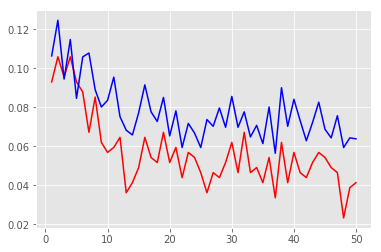

In [28]:
# TODO
estimators = [i for i in range(1,51)]
testerr = []
trainerr = []

for i in estimators:
    mmodel = BagDT(50, i)
    mmodel.fit(train)
    trainerr.append(1 - accuracy_score(train.y, mmodel.predict(train.drop(columns = ["y"]))))
    testerr.append(1 - accuracy_score(test.y, mmodel.predict(test.drop(columns = ["y"]))))
    
plt.plot(estimators, trainerr, "r-", label = "Training error")
plt.plot(estimators, testerr, "b-", label = "Testing error")
plt.show()

**<font color='purple'>Answers:</font>** I dont think that the error will change very much. We can see from the graph already that the error rate kind of starts to stabilize. I think that with even more estimators it just has less variance. Other option is that the training error will close in on $0$ and the testing error starts getting higher, in other words the model will start to grossly overfit.

### Subtask 2: Random Forest (1 point)

The ensemble can often be improved, if we decrease the correlation between the models within the ensemble. One way to do it is to use the random forest algorithm instead of bagged decision trees, and by this perform sampling on features as well, not only on instances.

- **(a)** Train a random forest classifier using sklearn.RandomForestClassifier, using 50 trees and sampling 50 features as candidates for each split decision. Measure and report its misclassification rate on train and test data.

In [29]:
# TODO
rfc = RandomForestClassifier(50, max_features = 50)
rfc.fit(train.drop(columns = ["y"]), train.y)

reportScores(rfc, train, test)

Training accuracy is 1.0000
Testing accuracy is 0.9589


**<font color='purple'>Misclassification rate on train data:</font>** The rate is around $0\%$

**<font color='purple'>Misclassification rate on test data:</font>** The rate is around $3.41\%$

- **(b)** Implement a simpler version of the random forest type classifier, where instead of sampling features in each decision node, the features are sampled before applying the decision tree learner. That is, each individual tree is constructed on a dataset obtained by sampling $f$ features (without replacement) and bootstrap-sampling $n$ instances (with replacement), where $f$ is a parameter specified by the user (who will be yourself in the next subtask). Measure and report the misclassification rate on train and test data using 50 trees with $f=50$ and compare to the random forest from the previous exercise.

In [32]:
class SimplifiedRandomForest:
    
    def __init__(self, samples, estimators, features):
        # TODO
        self.samples = samples
        self.estimators = estimators
        self.features = features
        
    def fit(self, data):
        # TODO
        self.trees = []
        self.cols = []
        for i in range(self.estimators):
            oldy = data.y
            newdat = data.drop(columns = ["y"]).sample(self.features, replace = False, axis = 1)
            newdat["y"] = oldy
            sampdat = newdat.sample(self.samples, replace = True)
            self.trees.append(DecisionTreeClassifier(random_state = 0).fit(sampdat.drop(columns = ["y"]), sampdat.y))
            self.cols.append(sampdat.drop(columns = ["y"]).columns)
            
    def predict(self, data):
        # TODO
        pred = np.array(np.zeros_like(data.iloc[:,0]))
        for idx, tree in enumerate(self.trees):
            pred += tree.predict(data[self.cols[idx]])
        
        pred = pred / self.estimators
        pred[pred < 0] = -1
        pred[pred >= 0] = 1
        return (pred)
    
myrf = SimplifiedRandomForest(50, 50, 50)
myrf.fit(train)

reportScores(myrf, train, test)

Training accuracy is 0.9767
Testing accuracy is 0.9525


**<font color='purple'>Misclassification rate on train data:</font>** The rate is around $2.84\%$

**<font color='purple'>Misclassification rate on test data:</font>** The rate is around $4.50\%$

**<font color='purple'>Comparison to random forest:</font>** Both error rates got a bit higher, but not very bad. Still would consider as good models, better than the baggers.

- **(c)** Try values $f=10$, $f=50$ and $f=300$ and draw a similar figure as in Subtask 1 (c) for each of these three cases. What happens with the error rates if we increase the number of used features? Why?

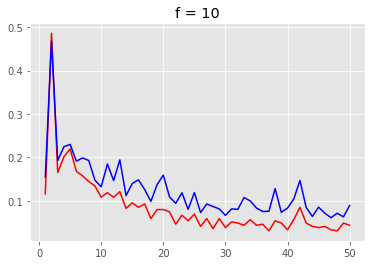

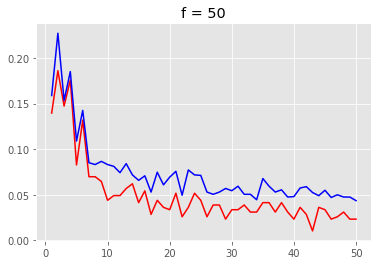

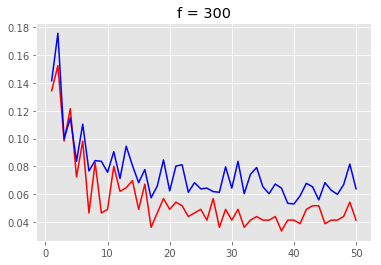

In [33]:
estimators = [i for i in range(1,51)]
testerr10 = []
trainerr10 = []
testerr50 = []
trainerr50 = []
testerr300 = []
trainerr300 = []

for i in estimators:
    mmodel = SimplifiedRandomForest(50, i, 10)
    mmodel.fit(train)
    trainerr10.append(1 - accuracy_score(train.y, mmodel.predict(train.drop(columns = ["y"]))))
    testerr10.append(1 - accuracy_score(test.y, mmodel.predict(test.drop(columns = ["y"]))))
    
for i in estimators:
    mmodel = SimplifiedRandomForest(50, i, 50)
    mmodel.fit(train)
    trainerr50.append(1 - accuracy_score(train.y, mmodel.predict(train.drop(columns = ["y"]))))
    testerr50.append(1 - accuracy_score(test.y, mmodel.predict(test.drop(columns = ["y"]))))
    
for i in estimators:
    mmodel = SimplifiedRandomForest(50, i, 300)
    mmodel.fit(train)
    trainerr300.append(1 - accuracy_score(train.y, mmodel.predict(train.drop(columns = ["y"]))))
    testerr300.append(1 - accuracy_score(test.y, mmodel.predict(test.drop(columns = ["y"]))))
    
plt.plot(estimators, trainerr10, "r-", label = "Training error")
plt.plot(estimators, testerr10, "b-", label = "Testing error")
plt.title("f = 10")
plt.show()

plt.plot(estimators, trainerr50, "r-", label = "Training error")
plt.plot(estimators, testerr50, "b-", label = "Testing error")
plt.title("f = 50")
plt.show()

plt.plot(estimators, trainerr300, "r-", label = "Training error")
plt.plot(estimators, testerr300, "b-", label = "Testing error")
plt.title("f = 300")
plt.show()

**<font color='purple'>Answers:</font>** The error rates dont really change with the higher amount of estimators. We can see that only the initial error rate changes a little bit, but that is because we cannot really have a good forest with only one tree.

### Subtask 3: Boosting (1 point)

In bagging each model is built independently of all others, this is also referred to as a parallel construction. In boosting each next model is built using the information from how the previous models performed, also referred to as a sequential construction. In each iteration of boosting the training dataset is re-weighted so that the next model learned by the weak learner would concentrate efforts on the points that were misclassified earlier.

- **(a)** Train Adaboost classifier on the same dataset doing 50 steps using sklearn.AdaBoostClassifier. Measure and report its misclassification rate on train and test data.

In [34]:
# TODO
adb = AdaBoostClassifier().fit(train.drop(columns = "y"), train.y)
reportScores(adb, train, test)

Training accuracy is 1.0000
Testing accuracy is 0.9466


**<font color='purple'>Misclassification rate on train data:</font>** The rate is about $0.0\%$

**<font color='purple'>Misclassification rate on test data:</font>** The rate is about $5.34\%$

- **(b)** Implement Adaboost yourself using DecisionTreeClassifier as the base learner with $\textrm{max_depth} = 2$. The instance weights can be specified using the sample_weights parameters when fitting the decision tree. Iterate 50 steps and measure its misclassification rate on train and test data. Compare to the result of the previous subtask (3a).

In [35]:
class AdaBoost:
    
    def __init__(self, iterations, classifiers):
        # TODO
        self.iterations = iterations
        self.classifiers = classifiers
        self.model = DecisionTreeClassifier(max_depth = 2)
        
    def fit(self, data):
        # TODO
        w = np.ones(len(data))/len(data)
        self.alphas = []
        self.trees = []
        
        for i in range(self.iterations):
            newmod = DecisionTreeClassifier(max_depth = 2).fit(data.drop(columns = ["y"]), data.y, sample_weight = w)
            pred = newmod.predict(data.drop(columns = ["y"]))
            
            self.trees.append(newmod)
            
            incorr = [int(x) for x in (pred != data.y)]
            
            err = np.dot(w, incorr)
            alpha = 0.5 * np.log( (1 - err) / float(err))
            
            
            self.alphas.append(alpha)
            
            w = np.multiply(w, np.exp([float(x) * alpha for x in incorr]))/sum(w)
        
            
    def predict(self, data):
        # TODO
        pred = np.zeros(len(data))
        for idx, tree in enumerate(self.trees):
            pred += np.dot(self.alphas[idx], tree.predict(data))
        
        return np.sign(pred)
    

myada= AdaBoost(50, 50)
myada.fit(train)

reportScores(myada, train, test)

Training accuracy is 1.0000
Testing accuracy is 0.9574


**<font color='purple'>Misclassification rate on train data:</font>** The rate is around $0.0\%$

**<font color='purple'>Misclassification rate on test data:</font>** The rate is around $4.26\%$

**<font color='purple'>Comparison to subtask (3a):</font>** For some reason my implementation is doing better than the sklearn one. It might be because I am using only a max_depth of $2$.

 ## How long did it take you to solve the homework?

Please answer as precisely as you can. It does not affect your points or grade in any way. It is okey, if it took 30 minutes or 24 hours. The results are used to improve the homeworks next year.

**<font color='red'>Task 1:</font>** $1$ hour

**<font color='red'>Task 2:</font>** 2 hours

**<font color='red'>In total (without bonus task):</font>** 3 hours

<font color='red'>Please use <b>"Kernel->Restart and Run All"</b> command in Jupyter Notebook before submitting the homework and check your results. This ensures that we would be able to replicate your results while grading.</font>

## Bonus Task. Neural network capacity (up to 3 bonus points)

In the lecture we have introduced a simple regression task, where the actual relationship is $y=x^2$. We generated 1000 training and 1000 test instances in the range [-1,+1] and solved the task using a multi-layer perceptron with 2 hidden layers using logistic sigmoid activation and output neuron using linear activation. This bonus exercise is about investigating the role of the network architecture, and the role of optimisation method for solving this regression task. Perform experiments, report and discuss their results. Feel free to use the code from the notebook that we provided after the practice session <LINK>. Note that you can consider reducing the training set size to make computations faster. When evaluating a particular architecture, calculate the loss on test data, but also plot the function that the regression model has learned.  Here are some questions to guide you:
* Can 1 hidden layer be enough? If yes, then how wide should that layer be (how many neurons)? 
* Does it matter what activation function is used (relu, tanh, sigmoid, linear)? 
* Does it matter what optimisation method is being used (SGD, RMSprop, Adam)? 
* In case of SGD, what learning rate values are good or bad? 
* Are the answers different if you use non-linear activation in the output neuron? 
* When using 2 hidden layers, how many neurons should these layers minimally have? 
* Is there any benefit in using more than 2 hidden layers? 
* Out of all successful network architectures that you tried, which had the minimal number of weights (the one in the lecture has 13)? 
* Which successful architecture had the fastest training time? 
* Are the results different if you use training and test data from the range [-10,+10] instead?

Note that you probably cannot answer all the combinations of all questions (number of layers, number of neurons in layers, activation function in each layer, optimisation method, learning rate, loss, speed) in full detail in reasonable time. However, in order to qualify for 2 bonus points we expect you to touch on all questions to some extent (no partial points given if touching some of the questions but not others). We expect you to provide enough explanation so that it is easy to follow your discussion of results. One (or potentially multiple) best solutions will be awarded 1 extra bonus point (thus getting 3 bonus points in total).

If you find it easier to provide the solution to the bonus task as a separate notebook, then feel free to do so. Given that you might choose to do a lot of computation, feel free to run it outside of notebooks and store the results into file(s). Your  bonus task solution notebook would then only need to read in the results and draw conclusions from them. If you have run any code outside of this current notebook then please submit everything together as a compressed file.

In [36]:
# TODO

 ### How long did it take you to solve the bonus task?

**<font color='red'>Answer:</font>**